In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Task 1 – The synthetic dataset

### Step 1:

In [84]:
train_data = pd.read_csv('synthetic_dataset.csv')
test_data = pd.read_csv('synthetic_test_dataset.csv')

reg = LinearRegression()
X_train = train_data[['x1', 'x2']]
y_train = train_data['y']

X_test = test_data[['x1', 'x2']]
y_test = test_data['y']

reg.fit(X_train, y_train)

yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)
train_err = 1 - accuracy_score(y_train, np.sign(yhat_train))
test_err = 1 - accuracy_score(y_test, np.sign(yhat_test))
pd.DataFrame({'Train Error': [train_err], 'Test Error': [test_err]})

,Train Error,Test Error
0,0.4,0.41


### Step 2:

In [85]:
model2 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))])
model2.fit(X_train, y_train)
yhat_train2 = model2.predict(X_train)
yhat_test2 = model2.predict(X_test)

train_err2 = 1 - accuracy_score(y_train, np.sign(yhat_train2))
test_err2 = 1 - accuracy_score(y_test, np.sign(yhat_test2))
pd.DataFrame({'Train Error': [train_err2], 'Test Error': [test_err2]})

,Train Error,Test Error
0,0.22,0.278


In [86]:
model3 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression(fit_intercept=False))])
model3.fit(X_train, y_train)
yhat_train3 = model3.predict(X_train)
yhat_test3 = model3.predict(X_test)

train_err3 = 1 - accuracy_score(y_train, np.sign(yhat_train3))
test_err3 = 1 - accuracy_score(y_test, np.sign(yhat_test3))
pd.DataFrame({'Train Error': [train_err3], 'Test Error': [test_err3]})

,Train Error,Test Error
0,0.04,0.198


In [87]:
model4 = Pipeline([('poly', PolynomialFeatures(degree=4)),
                   ('linear', LinearRegression(fit_intercept=False))])
model4.fit(X_train, y_train)
yhat_train4 = model4.predict(X_train)
yhat_test4 = model4.predict(X_test)

train_err4 = 1 - accuracy_score(y_train, np.sign(yhat_train4))
test_err4 = 1 - accuracy_score(y_test, np.sign(yhat_test4))
pd.DataFrame({'Train Error': [train_err4], 'Test Error': [test_err4]})

,Train Error,Test Error
0,0.02,0.204


### Step 3:

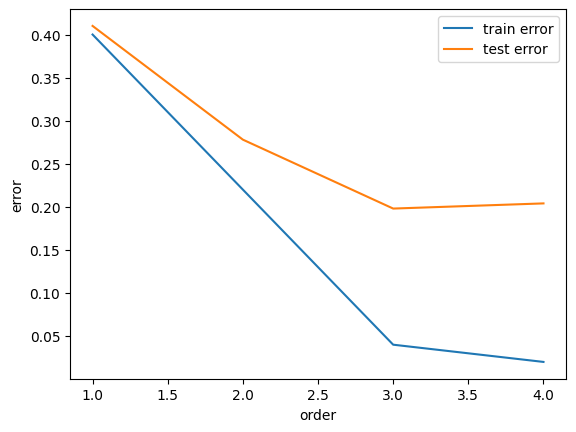

In [88]:
orders = [1, 2, 3, 4]
plt.plot(orders, [train_err, train_err2, train_err3, train_err4])
plt.plot(orders, [test_err, test_err2, test_err3, test_err4])
plt.xlabel('order')
plt.ylabel('error')
plt.legend(['train error', 'test error'])
plt.show()

### Step 4:

From the result we can observe that as the order of the polynomial increases, the training error decreases a lot, but the test error does not decrease significantly when the order larger than 2. This is because model overfiting occurred. I will chose quadratic model, because the test error does not decrease significantly when the order larger than 2. We can also plot the model's decision boundary, which show a quadratic model fitting good.

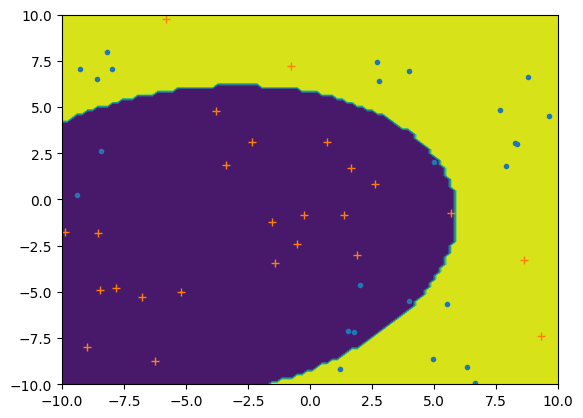

In [107]:
from sklearn.inspection import DecisionBoundaryDisplay
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
grid = np.vstack([x1.ravel(), x2.ravel()]).T
y_pred = model2.predict(pd.DataFrame({'x1': grid[:,0], 'x2': grid[:,1]}))
y_pred = np.reshape(y_pred, x1.shape)
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=np.sign(y_pred))
display.plot()
plt.plot(X_train.loc[y_train == 1, 'x1'], X_train.loc[y_train == 1, 'x2'], '.')
plt.plot(X_train.loc[y_train == -1, 'x1'], X_train.loc[y_train == -1, 'x2'], '+')
plt.show()